In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize

# Define the relative path to the JSON file
file_path = 'documents/tweets_ws23_v1.json'

# Load json file
with open(file_path) as json_file:
    json_data = json.load(json_file)

In [3]:
#show loaded json data
json_data

[{'source_created_at': '2020-09-18 21:56:20.798000',
  'author_id': '593731316',
  'text': '@DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works',
  'source': 'sprinklr',
  'language': 'en',
  'longitude': -0.12574,
  'latitude': 51.50853,
  'id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
  'labels': {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'relevant': True,
     'topic': 'service',
     'ground_truth': True,
     'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
   'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'sentiment': 'negative',
     'ground_truth': True,
     'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}},
 {'source_created_at': '2020-10-13 07:31:53.122000',
  'author_id': '745583289520496640',
  'text': '@DulwichHistory Loving the complaint about people having to wait 10 minutes for a train

In [4]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)


['id', 'source', 'labels', 'user_id', 'text', 'source_id', 'sentiment', 'longitude', 'tweet_id', 'topic', 'ground_truth', 'source_created_at', 'latitude', 'language', 'relevant', 'author_id']


In [5]:
def flatten_json(y):
    """Flatten a nested JSON object"""
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Flatten the JSON data
flattened_data = [flatten_json(entry) for entry in json_data]

# Convert the list of flattened dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)

# Show the DataFrame
df

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,neutral,True,be02e403-49c2-e366-3324-09f1696ce526,1149220424313708544
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10,NaN
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0,NaN
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf,NaN


In [6]:
#Count total number of tweets in text column
df['text'].count()

16949

In [7]:
#Find total number of retweets in text column
df['text'].str.contains('RT').sum()

37

In [8]:
#Give source_id column's included values
df.source_id.unique()


array([nan, '1107959403003723776', '1106120236753977344', ...,
       '1149222785065132033', '1149334205945585665',
       '1149220424313708544'], dtype=object)

In [9]:
df.describe()

,longitude,latitude
count,1425.000000,1425.000000
mean,-0.600207,50.943704
std,4.618717,7.953581
min,-79.416300,-16.925528
25%,-0.703120,51.508530
50%,-0.125740,51.508530
75%,-0.125740,52.160450
max,145.771469,56.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_created_at                16949 non-null  object 
 1   author_id                        16949 non-null  object 
 2   text                             16949 non-null  object 
 3   source                           16949 non-null  object 
 4   language                         16949 non-null  object 
 5   longitude                        1425 non-null   float64
 6   latitude                         1425 non-null   float64
 7   id                               16949 non-null  object 
 8   labels_topic_0_tweet_id          16949 non-null  object 
 9   labels_topic_0_user_id           16949 non-null  object 
 10  labels_topic_0_relevant          16949 non-null  bool   
 11  labels_topic_0_topic             16949 non-null  object 
 12  labels_topic_0_gro

In [11]:
#set source_created_at as datetime
df['source_created_at'] = pd.to_datetime(df['source_created_at'], format='%Y-%m-%d %H:%M:%S')

#remove decimals after seconds
df['source_created_at'] = df['source_created_at'].dt.floor('s')

df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN


In [12]:
#list of columns
df.columns

Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels_topic_0_tweet_id',
       'labels_topic_0_user_id', 'labels_topic_0_relevant',
       'labels_topic_0_topic', 'labels_topic_0_ground_truth',
       'labels_topic_0_id', 'labels_sentiment_0_tweet_id',
       'labels_sentiment_0_user_id', 'labels_sentiment_0_sentiment',
       'labels_sentiment_0_ground_truth', 'labels_sentiment_0_id',
       'source_id'],
      dtype='object')

In [13]:
#Count total duplicated rows by author_id, source_created_at and  text together
df[df.duplicated(['author_id', 'text', "source_created_at"], keep=False)].shape[0]

2219

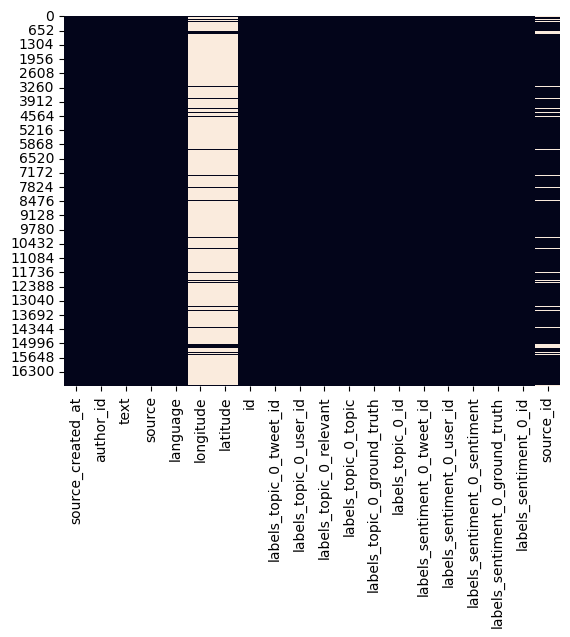

In [14]:
# Create a heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()

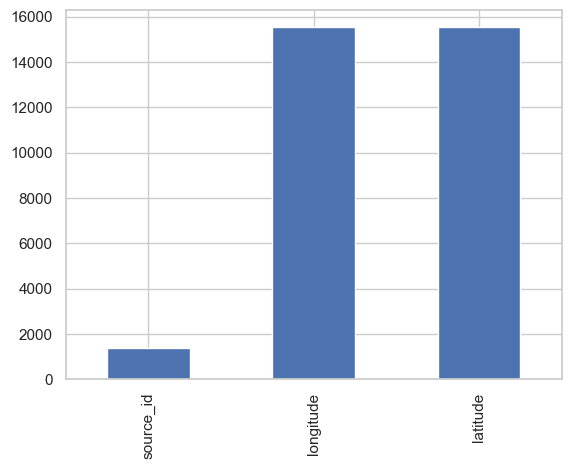

In [15]:
#Create a barplot of missing values by using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()


In [16]:
#count how many languages are used
df['language'].value_counts()

en-GB    10051
en        6898
Name: language, dtype: int64

In [17]:
#count how many sources are used
df['source'].value_counts()

brandwatch    15548
sprinklr       1401
Name: source, dtype: int64

C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_14780\4237596370.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


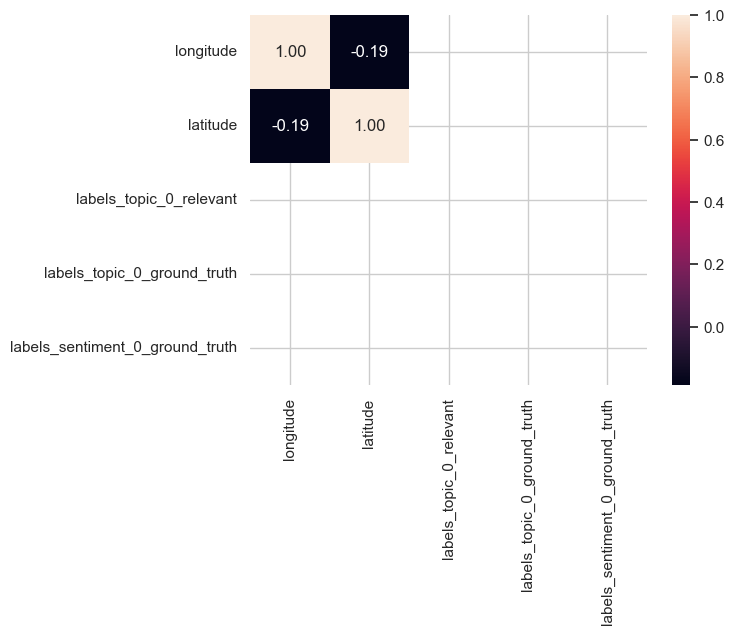

In [18]:
#Create a correlation matrix between all columns
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

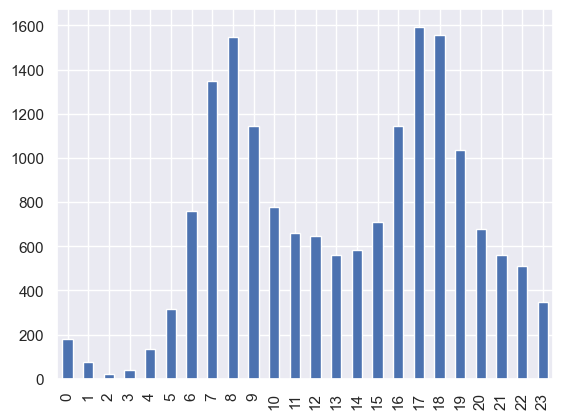

In [19]:
#Find the largest number of tweets sent hours of the day and plot them from 0 to 23
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['source_created_at'].dt.hour.value_counts().sort_index().plot.bar()
plt.show()

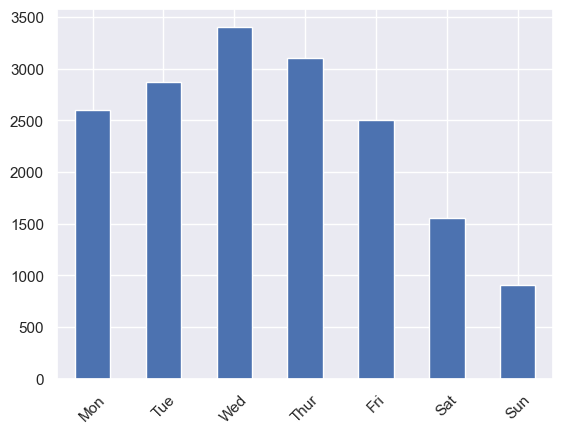

In [20]:
##Find the largest number of tweets sent days and plot them from Monday to Sunday and write Monday, Tuesday etc. instead of 0,1,2 etc.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['source_created_at'].dt.dayofweek.value_counts().sort_index().plot.bar()
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

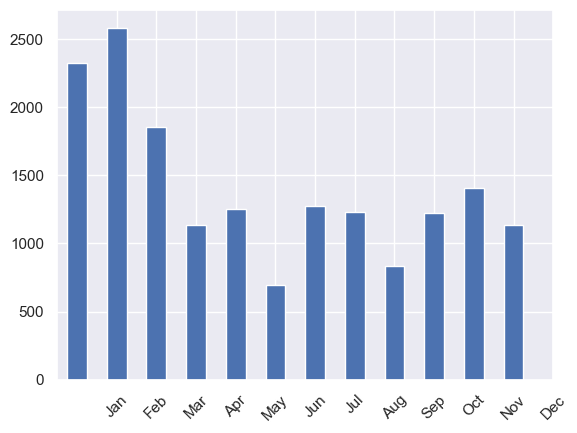

In [21]:
#Find the largest number of tweets sent months and plot them from January to December and write January, February etc. instead of 1,2 etc.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['source_created_at'].dt.month.value_counts().sort_index().plot.bar()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec'], rotation=45)
plt.show()

In [22]:
#Find oldest and newest tweets
df['source_created_at'].min()
print(df['source_created_at'].min())
df['source_created_at'].max()
print(df['source_created_at'].max())

2019-01-16 10:41:46
2020-12-01 07:49:12


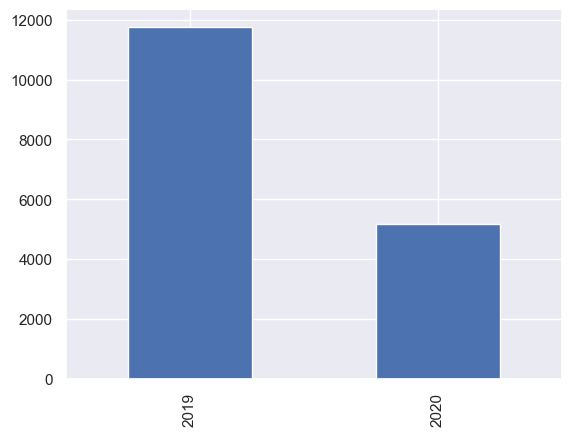

In [23]:
#Find the largest number of tweets sent years and plot them from 2019 to 2020
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['source_created_at'].dt.year.value_counts().sort_index().plot.bar()
plt.show()

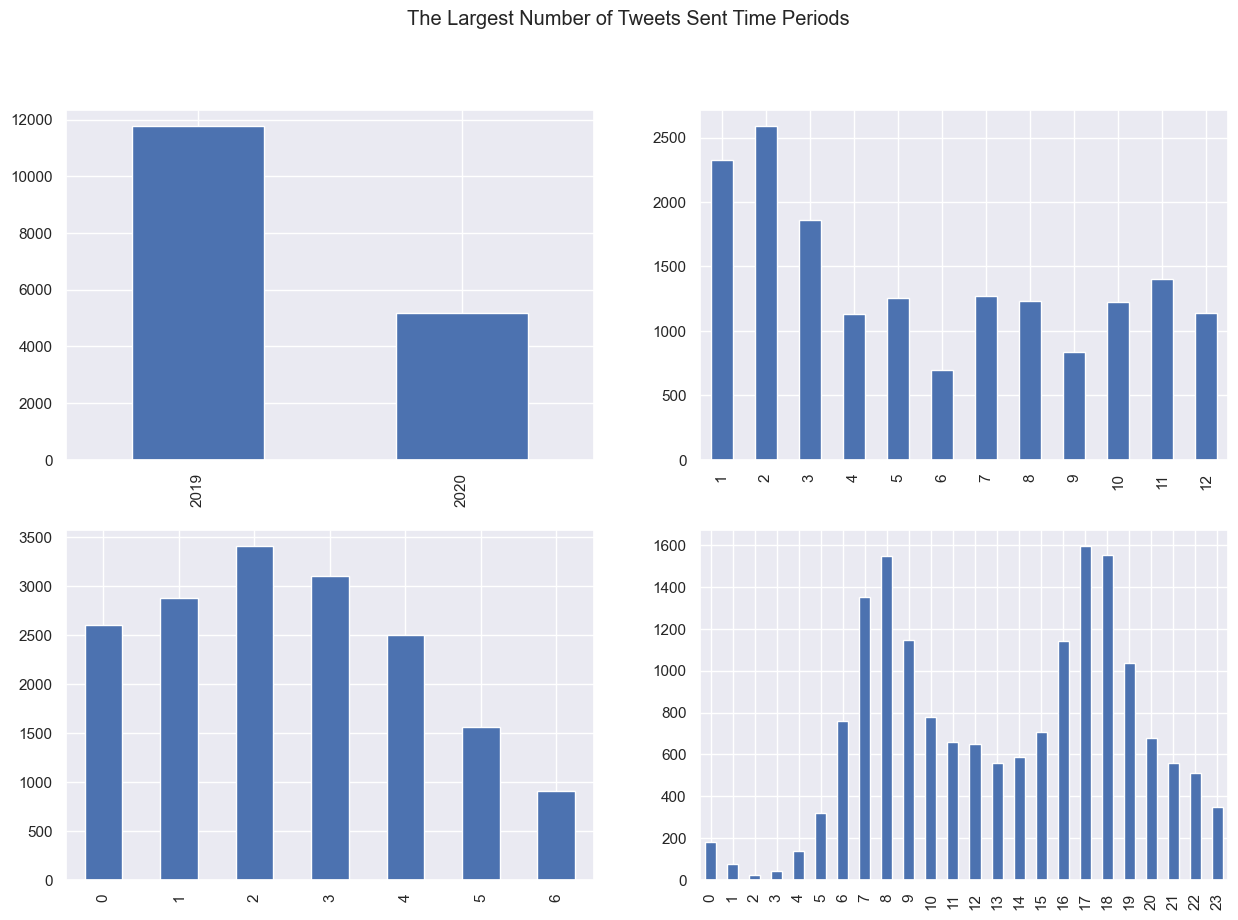

In [24]:
#Merge all created graphs in a 2x2 matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df['source_created_at'].dt.hour.value_counts().sort_index().plot.bar(ax=axes[1,1])
df['source_created_at'].dt.dayofweek.value_counts().sort_index().plot.bar(ax=axes[1,0])
df['source_created_at'].dt.month.value_counts().sort_index().plot.bar(ax=axes[0,1])
df['source_created_at'].dt.year.value_counts().sort_index().plot.bar(ax=axes[0,0])
plt.suptitle("The Largest Number of Tweets Sent Time Periods")
plt.show()

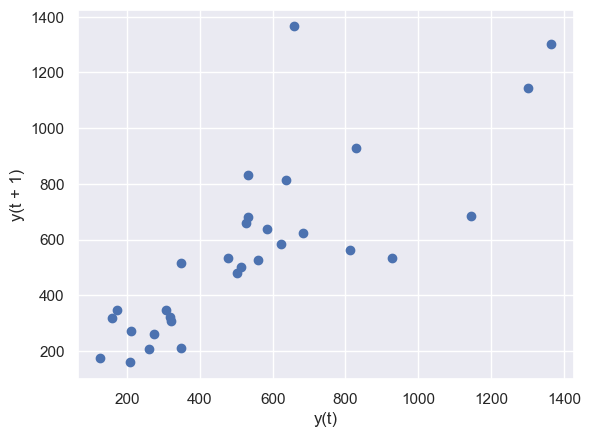

In [25]:
#Create a lag plot to see if there is any correlation between the number of tweets in a day and the next day
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
pd.plotting.lag_plot(df['source_created_at'].dt.day.value_counts().sort_index())
plt.show()

A linear shape to the Lag Plot suggests that an autoregressive model is probably a better choice.

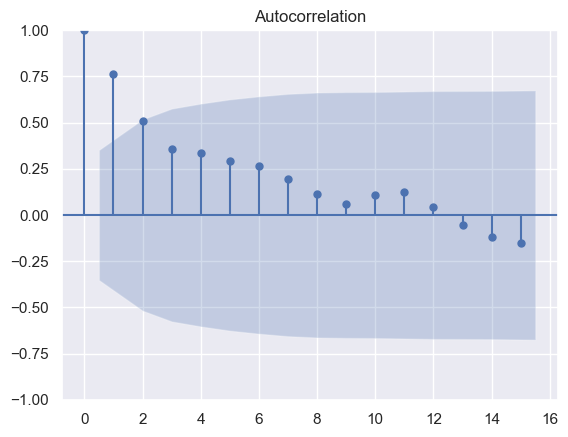

In [26]:
#compute and visualize autocorrelation and partial autocorrelation of the number of tweets in a day
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['source_created_at'].dt.day.value_counts().sort_index())
plt.show()

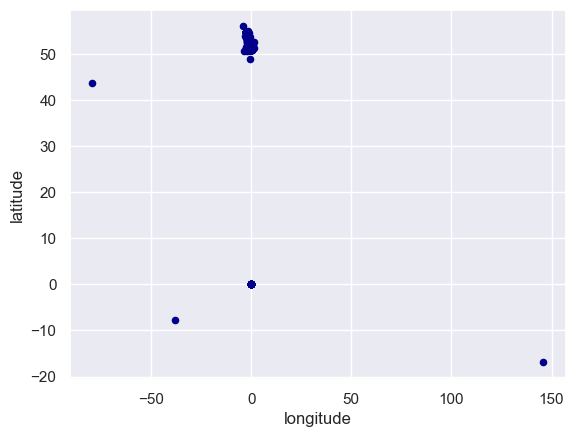

,latitude,longitude,counts
71,51.50853,-0.12574,563
158,54.75844,-2.69531,219
128,52.16045,-0.70312,59
11,50.82838,-0.13947,47
124,52.13459,-0.46632,43
2,0.00000,0.00000,30
129,52.20000,0.11667,27
112,51.87967,-0.41748,24
98,51.75000,-0.33333,22
70,51.50799,0.28333,18


In [27]:
#Check geographical distribution of tweets by using latitude and longitude
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df.plot.scatter(x='longitude', y='latitude', c='DarkBlue')
plt.show()

#Show 10 most used tweets where latitude and longitude are same
df.groupby(['latitude', 'longitude']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)


In [28]:
#Count how many tweets has latitude as 51.50853 and longitude as -0.12574
df[(df['latitude'] == 51.50853) & (df['longitude'] == -0.12574)].shape[0]

563

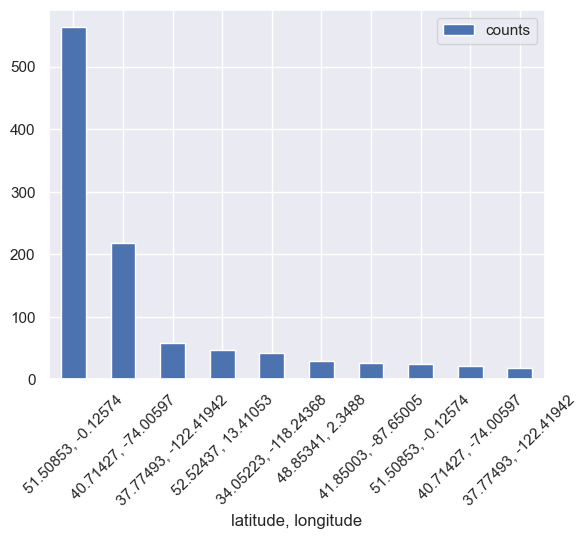

In [29]:
#Create a barplot for 10 most used tweets where latitude and longitude are same
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df.groupby(['latitude', 'longitude']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10).plot.bar(x='latitude', y='counts')
#Change the x axis labels to latitude and longitude values
plt.xticks([0,1,2,3,4,5,6,7,8,9], ['51.50853, -0.12574', '40.71427, -74.00597', '37.77493, -122.41942', '52.52437, 13.41053', '34.05223, -118.24368', '48.85341, 2.3488', '41.85003, -87.65005', '51.50853, -0.12574', '40.71427, -74.00597', '37.77493, -122.41942'], rotation=45)
#Change x axis label to 'latitude, longitude'
plt.xlabel('latitude, longitude')
plt.show()

In [30]:
#explote length of text
df['text_length'] = df['text'].str.len()

#preview length of text
df['text_length'].head()


0    134
1    132
2    163
3    186
4    265
Name: text_length, dtype: int64

In [31]:
#f;nd longest and shortest text
df['text_length'].min()
print(df['text_length'].min())

df['text_length'].max()
print(df['text_length'].max())

18
853


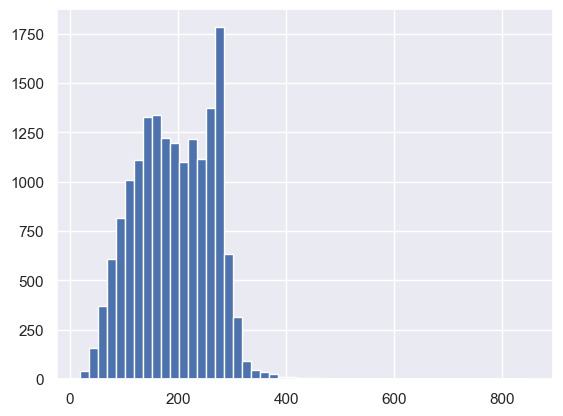

In [32]:
#create a histogram of text length
import matplotlib.pyplot as plt
df['text_length'].hist(bins=50)
plt.show()


In [33]:
#show shortest 10 text
df.sort_values(by=['text_length']).head(10)

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,...,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id,text_length
7083,2019-02-04 22:57:02,20134745,@TLRailUK Rubbish.,brandwatch,en-GB,NaN,NaN,06b3dad7-2cf9-71e9-6005-11acd5af18f0,06b3dad7-2cf9-71e9-6005-11acd5af18f0,Z003XDCS,...,none,True,4b57de56-5fbc-e3fd-8763-1f413272a30a,06b3dad7-2cf9-71e9-6005-11acd5af18f0,Z003XDCS,negative,True,3477c904-b572-7d65-4408-92b679544841,1092557671755145218,18
7082,2019-02-04 22:57:02,20134745,@TLRailUK Rubbish.,brandwatch,en-GB,NaN,NaN,06b3dad7-2cf9-71e9-6005-11acd5af18f0,06b3dad7-2cf9-71e9-6005-11acd5af18f0,Z003XDCS,...,none,True,4b57de56-5fbc-e3fd-8763-1f413272a30a,06b3dad7-2cf9-71e9-6005-11acd5af18f0,Z003XDCS,negative,True,3477c904-b572-7d65-4408-92b679544841,1092557671755145218,18
13516,2019-04-16 14:18:21,2909525866.0,Thameslink has WiFi ?,brandwatch,en,NaN,NaN,92e7e824-59ec-6a83-d092-2c3bd7d879f3,92e7e824-59ec-6a83-d092-2c3bd7d879f3,Z003XDCS,...,wifi,True,8a9f94be-90d3-68f1-99b3-3e4a55d1e2f8,92e7e824-59ec-6a83-d092-2c3bd7d879f3,Z003XDCS,neutral,True,1c5026f7-1bea-50ba-5b26-84e51436c7f5,1118156680733364224,21
5493,2019-06-27 17:27:10,154996779,@TLRailUK Audio is ok,brandwatch,en-GB,NaN,NaN,b568609d-5c28-71b1-3f02-1e4b9ce29582,b568609d-5c28-71b1-3f02-1e4b9ce29582,Z003XDCS,...,announcements,True,0f67069f-2080-004c-01a4-65fa254270f6,b568609d-5c28-71b1-3f02-1e4b9ce29582,Z003XDCS,neutral,True,aab130a3-090b-8aa8-cccb-54f9b6ddc5b2,1144296123730976769,21
5642,2020-01-24 16:24:37,920530940341948416,@TLRailUK Delay repay?,brandwatch,en,NaN,NaN,62967b11-6de3-9b07-54d4-17ecdb11eeb6,62967b11-6de3-9b07-54d4-17ecdb11eeb6,Z003XDCS,...,delays,True,ca60d87a-4173-91bf-23a5-f307977d6dd0,62967b11-6de3-9b07-54d4-17ecdb11eeb6,Z003XDCS,neutral,True,d819a73c-65c1-daea-3c70-628e85cf1040,1220744222250237953,22
5651,2019-12-17 07:51:51,406882630,@TLRailUK Delays AGAIN,brandwatch,en,NaN,NaN,04ef6519-8705-554c-b82d-ec5720e6a2d2,04ef6519-8705-554c-b82d-ec5720e6a2d2,Z003XDCS,...,delays,True,915cad7d-072f-b32e-e643-669f64fa1926,04ef6519-8705-554c-b82d-ec5720e6a2d2,Z003XDCS,negative,True,d4a2f768-2c9a-8a2b-0e0d-0ec419bd9818,1206844442713440257,22
15118,2020-11-09 09:21:48,1318251600,Thameslink train doors.,sprinklr,en,-0.13947,50.82838,54394469-037b-02b0-3473-bee12483343a,54394469-037b-02b0-3473-bee12483343a,Z003XDCS,...,doors,True,c084ea75-05ca-3234-fd89-fb0e792c2bb1,54394469-037b-02b0-3473-bee12483343a,Z003XDCS,negative,True,9dce3a7d-0777-2d21-60bf-93e134d207c5,NaN,23
9207,2020-01-31 11:45:03,42852279,@TLRailUK re: your WiFi.,brandwatch,en-GB,NaN,NaN,a1c0c3b5-01e0-51f0-8f3b-e4c0cdb8045f,a1c0c3b5-01e0-51f0-8f3b-e4c0cdb8045f,Z003XDCS,...,wifi,True,25faec75-b3fa-03cb-a81c-17ee0c4c1ec8,a1c0c3b5-01e0-51f0-8f3b-e4c0cdb8045f,Z003XDCS,neutral,True,fc3c405b-c193-1423-8060-13e57938cd39,1223210580888211456,24
624,2019-05-28 21:11:25,20395687.0,#Thameslink delays misery,brandwatch,en-GB,NaN,NaN,f72d37cf-0613-0f6a-4463-23510c96a115,f72d37cf-0613-0f6a-4463-23510c96a115,Z003XDCS,...,delays,True,2f8d8abc-1d30-f441-05a0-8162fe336859,f72d37cf-0613-0f6a-4463-23510c96a115,Z003XDCS,negative,True,f6aa8152-0626-0703-d6a9-c6fcd326344e,1133480923083759621,25
13511,2019-11-28 08:03:13,241654390,Thameslink delays again x,brandwatch,en-GB,NaN,NaN,10c06f67-0959-8203-3f50-1a0051aca0ee,10c06f67-0959-8203-3f50-1a0051aca0ee,Z003XDCS,...,delays,True,f236cdba-bbbb-c5aa-f778-82cf518eb14f,10c06f67-0959-8203-3f50-1a0051aca0ee,Z003XDCS,neutral,True,e792ebfc-d6ec-b2b5-fc62-d0c203467ba9,1199961933765591040,25


In [34]:
#Find most used 10 words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['text']).split()).most_common(10)
#Print most used 10 words
print(Counter(" ".join(df['text']).split()).most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('@TLRailUK', 11081), ('train', 8718), ('-', 6914), ('Thameslink', 4857), ('I', 4803), ('plat', 3304), ('delayed', 3056), ('due', 2673), ('time', 2608), ('trains', 2268)]


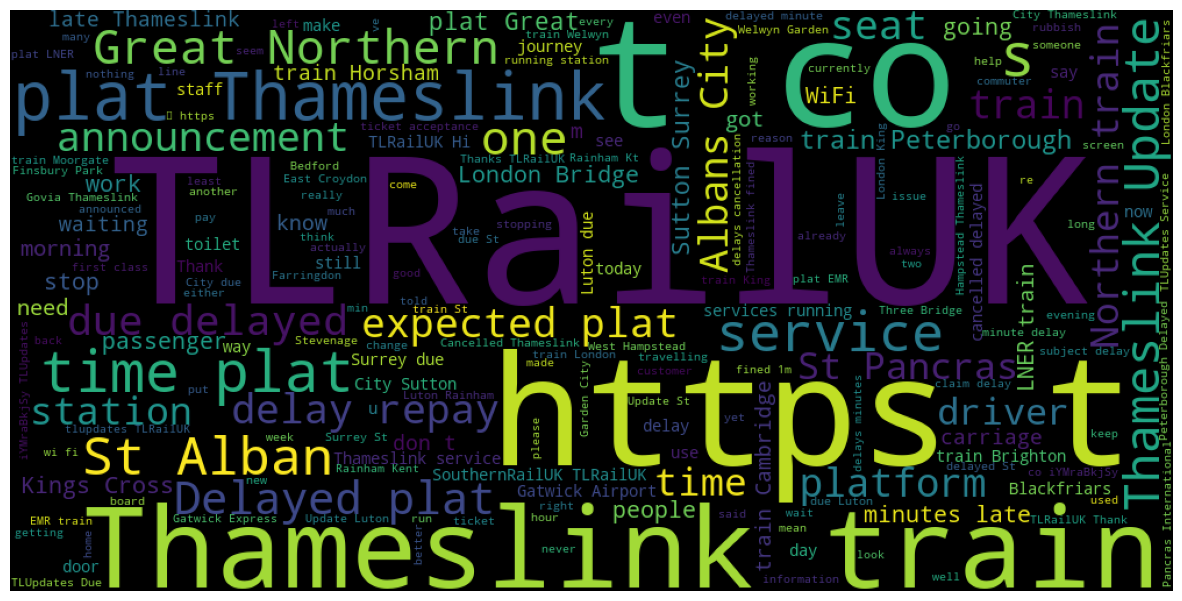

In [35]:
#Plot a wordcloud of most used 100 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(df['text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


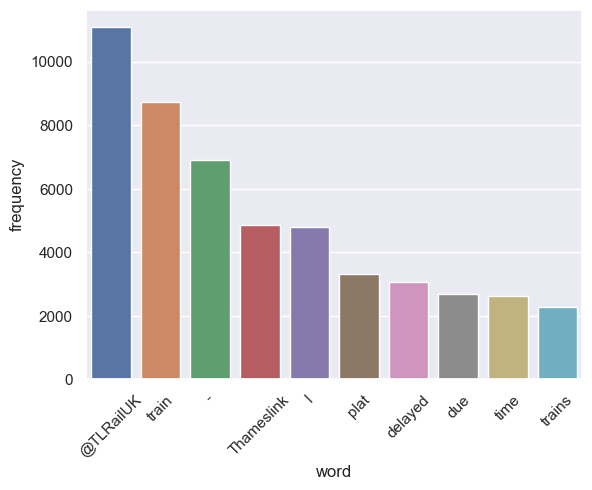

In [36]:
#Create a bar chart to visualize the most frequent words in the text column
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['text']).split()).most_common(10)
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = Counter(" ".join(df['text']).split()).most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

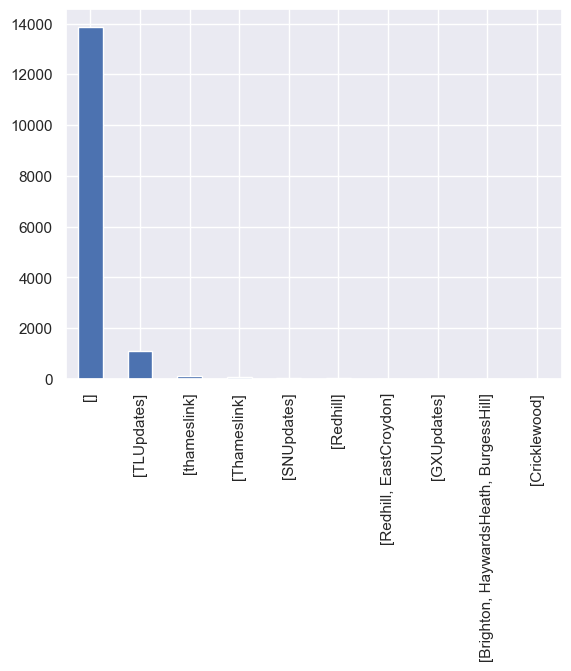

[]    13866
Name: hashtags, dtype: int64


In [37]:
# Analyze the frequency of different hashtags in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags'].head()
df['hashtags'].value_counts().head(10)
df['hashtags'].value_counts().head(10).plot.bar()
plt.show()

#Write most frequent hashtag
df['hashtags'].value_counts().head(1)
print(df['hashtags'].value_counts().head(1))


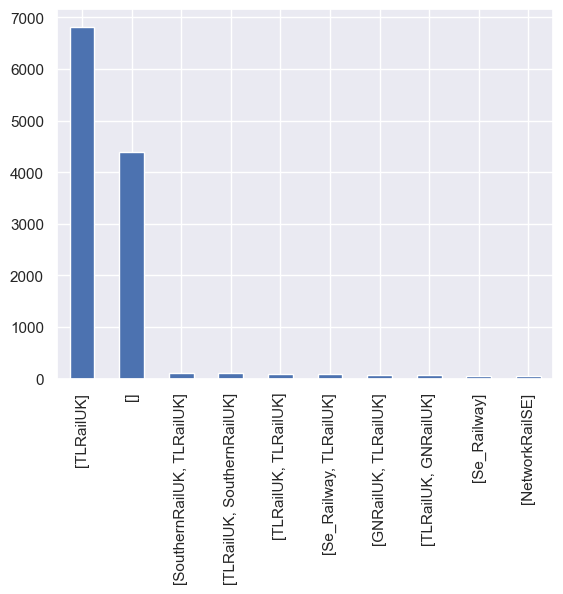

In [38]:
# Analyze the frequency of different mentions in text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import re
df['mentions'] = df['text'].apply(lambda x: re.findall(r"@(\w+)", x))
df['mentions'].head()
df['mentions'].value_counts().head(10)
df['mentions'].value_counts().head(10).plot.bar()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


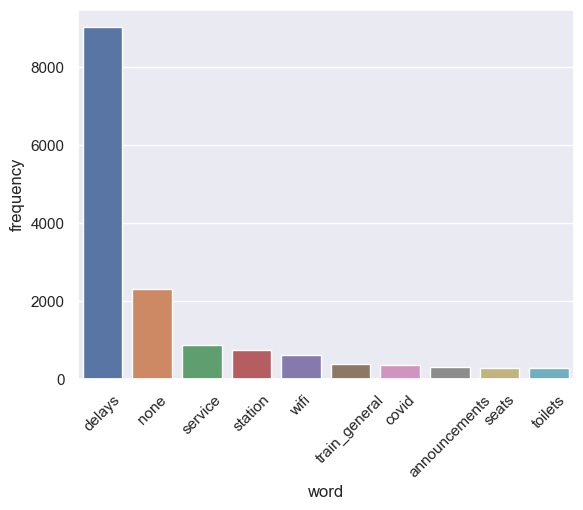

In [39]:
#Find most frequent words in labels_topic_0_topic column and plot them as a bar chart from most frequent to least frequent
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['labels_topic_0_topic'] = df['labels_topic_0_topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Counter(" ".join(df['labels_topic_0_topic']).split()).most_common(10)
#Create a bar chart to visualize the most frequent words in the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
Counter(" ".join(df['labels_topic_0_topic']).split()).most_common(10)
most_common_words = Counter(" ".join(df['labels_topic_0_topic']).split()).most_common(10)
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']
most_common_words
sns.barplot(x='word', y='frequency', data=most_common_words)
plt.xticks(rotation=45)
plt.show()

<Axes: >

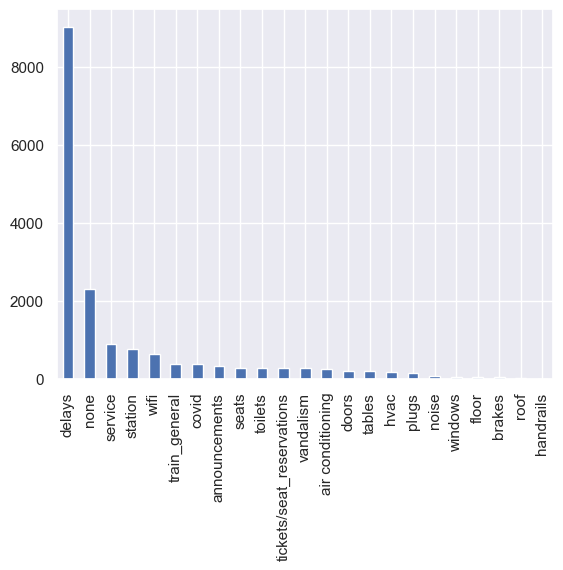

In [40]:
df["labels_topic_0_topic"].value_counts().plot.bar()

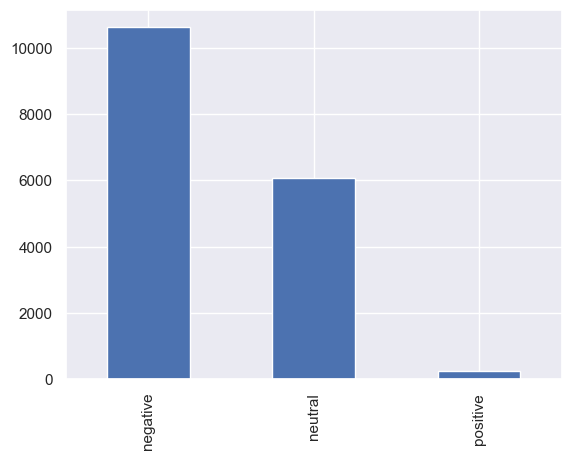

In [41]:
#Analyze the sentiment of the tweets by labels_sentiment_0_sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['labels_sentiment_0_sentiment'].value_counts()
df['labels_sentiment_0_sentiment'].value_counts().plot.bar()
plt.show()

In [42]:
# Analyze the emotion of the text column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from textblob import TextBlob
df['text'].apply(lambda x: TextBlob(x).sentiment)
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
df['sentiment'].head()
df['sentiment'].plot.hist()
plt.show()

# Add title and labels to the plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
df['sentiment_category'].value_counts().plot.bar()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()